In [12]:
import scienceplots 
import matplotlib
import matplotlib.pyplot as plt
import platform
plt.style.use(['science', 'no-latex', 'cjk-sc-font'])
system = platform.system()  # 获取操作系统类型

if system == 'Windows':
    font = {'family': 'SimHei'}
elif system == 'Darwin':
    font = {'family': 'Arial Unicode MS'}
else:
    font = {'family': 'sans-serif'}
matplotlib.rc('font', **font)  # 设置全局字体

In [13]:
# 生成示例时间序列数据
n_samples, dim, sigma = 1000, 1, 1
n_bkps = 4  # 假设有4个变化点
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
print(signal.shape)
print(bkps)
signal

(1000, 1)
[198, 415, 608, 807, 1000]


array([[-10.36078315],
       [-10.20386008],
       [ -9.97983878],
       [-10.53406566],
       [-10.96541799],
       [-11.60296402],
       [ -9.07370377],
       [ -9.58690826],
       [-10.04317108],
       [ -9.76575459],
       [-10.13636127],
       [ -9.7153218 ],
       [-10.92726463],
       [-11.04328909],
       [ -9.84038556],
       [-10.0112579 ],
       [ -9.61134673],
       [ -9.76827824],
       [ -9.44231794],
       [ -9.71058646],
       [-10.28254119],
       [-10.55722112],
       [ -9.29458294],
       [ -9.13139428],
       [-10.11811788],
       [-11.40210727],
       [ -8.93280899],
       [ -9.78819907],
       [ -9.24746545],
       [ -9.54923045],
       [ -9.37814334],
       [ -9.45464844],
       [-10.87666483],
       [ -9.68850053],
       [ -8.68244315],
       [ -9.43781278],
       [ -7.64371119],
       [-10.67536943],
       [-10.85494458],
       [-12.28088245],
       [ -9.10168235],
       [ -7.5626554 ],
       [ -9.54357309],
       [-10

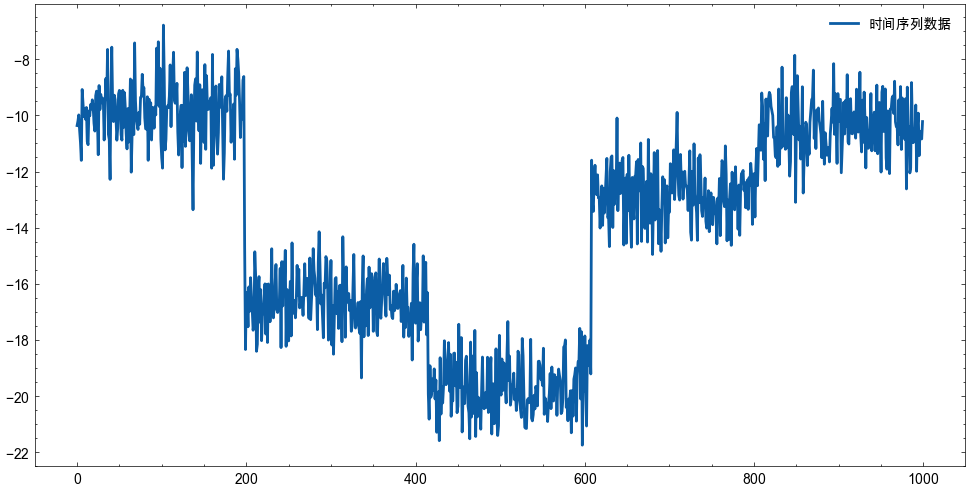

In [14]:
# 创建时间序列图
plt.figure(figsize=(12, 6))
plt.plot(signal, lw=2, label='时间序列数据')
plt.legend()

#保存
plt.savefig('ts-data.png', dpi=200)

# 显示
plt.show()

In [15]:
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)
result

[200, 415, 610, 805, 1000]

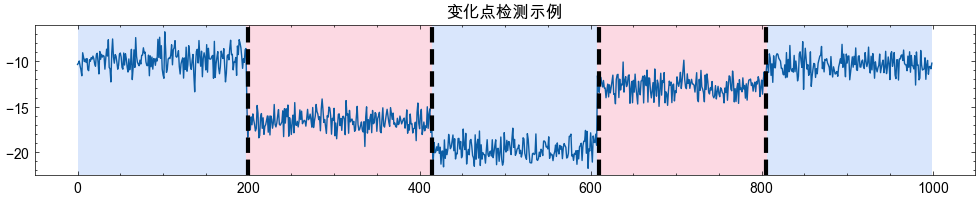

In [16]:
# 绘制结果
rpt.display(signal, bkps, result)
plt.title("变化点检测示例")

#保存图
plt.savefig('change-point.png', dpi=200)

#显示
plt.show()

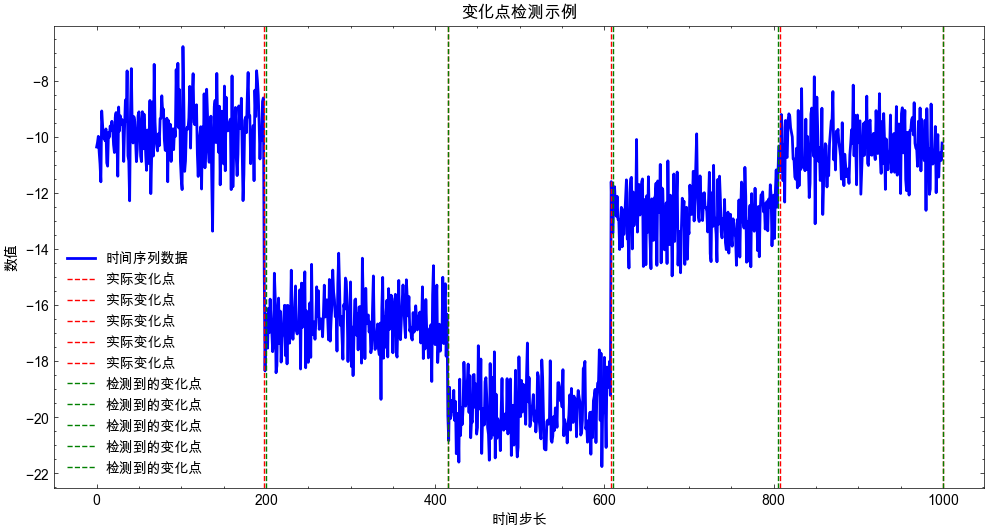

In [19]:
import matplotlib.pyplot as plt
import ruptures as rpt


# 创建时间序列图
plt.figure(figsize=(12, 6))
plt.plot(signal, lw=2, label='时间序列数据', color='blue')

# 绘制变化点位置
for bkp in bkps:
    plt.axvline(x=bkp, color='red', linestyle='--', label='实际变化点')
for bkp in result:
    plt.axvline(x=bkp, color='green', linestyle='--', label='检测到的变化点')

    
# 自定义图例
custom_legend = [
    plt.Line2D([0], [0], color='blue', lw=2, label='时间序列数据'),
    plt.Line2D([0], [0], color='red', linestyle='--', label='变化点'),
    plt.Line2D([0], [0], color='green', linestyle='--', label='检测到的变化点')
]

plt.legend(handles=custom_legend)

plt.title("变化点检测示例")
plt.xlabel("时间步长")
plt.ylabel("数值")
plt.legend()
plt.show()

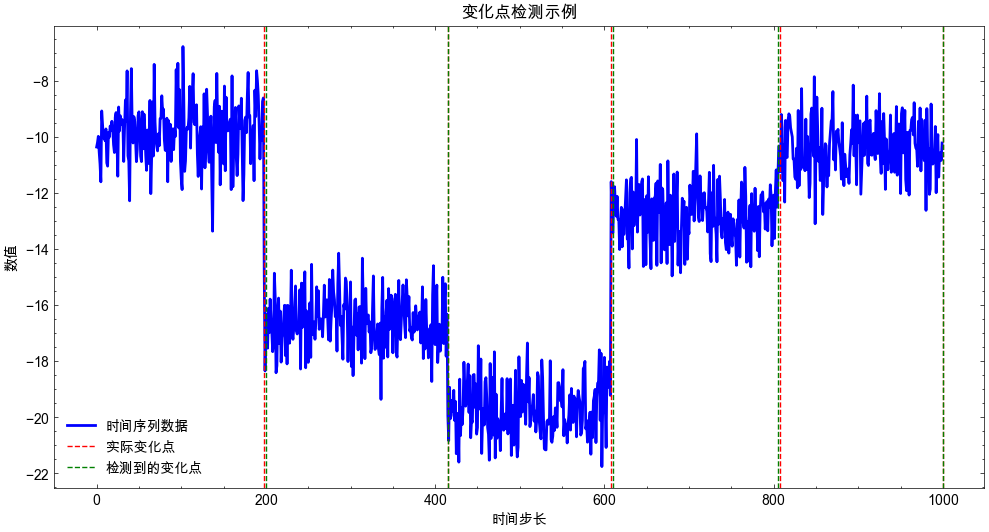

In [22]:
import matplotlib.pyplot as plt
import ruptures as rpt


# 创建时间序列图
plt.figure(figsize=(12, 6))

# 绘制时间序列数据
plt.plot(signal, lw=2, label='时间序列数据', color='blue')

# 绘制实际变化点位置
for bkp in bkps:
    plt.axvline(x=bkp, color='red', linestyle='--', label='实际变化点')

# 绘制检测到的变化点位置
for bkp in result:
    plt.axvline(x=bkp, color='green', linestyle='--', label='检测到的变化点')

plt.title("变化点检测示例")
plt.xlabel("时间步长")
plt.ylabel("数值")

# 显示单独的图例
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))  # 去除重复的标签
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # 获取对应的图例项
plt.legend(unique_handles, unique_labels)
#保存图
plt.savefig('change-point2.png', dpi=200)
plt.show()
